# Data Augmentation

Transform data, if image flipping, rotate, color...

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
import keras
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

C:\Users\ebocarru\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
# Augmented images
plots(aug_images, figsize=(20,7), rows=2)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *

from sklearn.metrics import confusion_matrix
import itertools

In [2]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [3]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
                         channel_shift_range=10., horizontal_flip=True)

In [6]:
image_path = 'all/train/dog.5115.jpg'

C:\Users\ebocarru\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


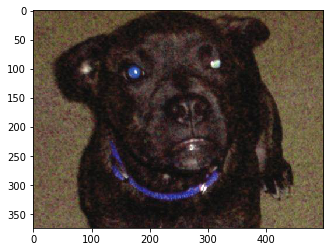

In [7]:
# Obtain image
image = np.expand_dims(ndimage.imread(image_path),0)
plt.imshow(image[0])

In [8]:
# Generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [9]:
# Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

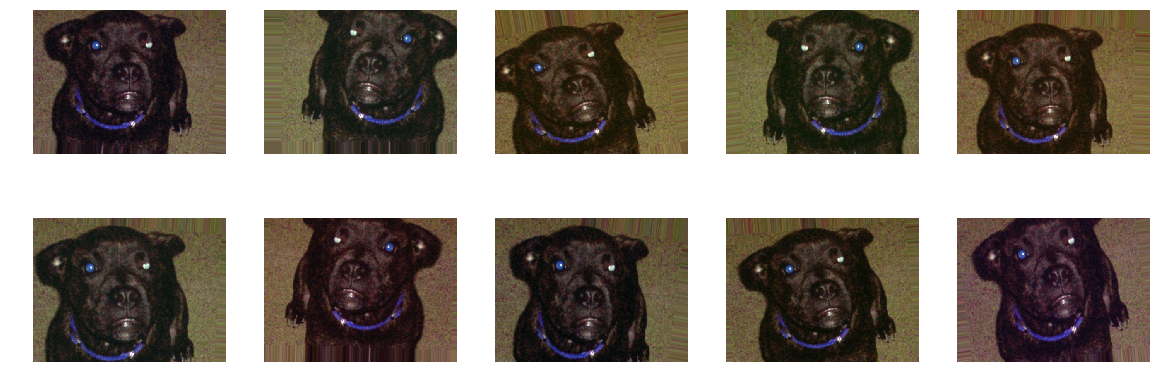

In [10]:
# Augmented images
plots(aug_images, figsize=(20,7), rows=2)